In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Theory
* Linear Regression is a regression problem under supervised learning. 
* This means the target values are continuous
* In a regression problem, we will have:
    - **Independent variables**: These compose the Feature matrix
    - **Dependent variable**: This is a feature that is influenced by the Independent variables; composes the target
    
* Broadly speaking, there are two types of data
    - **Continuous data**: These is generally numeric data that is sampled from an infinite domain ($\mathbb{R},\mathbb{N}$ and so on)
    - **Categorical data**: The values are sampled from a domain that is a finite set.

## The data pipeline
1. We first collect and clean some data, to be used as training data
2. We then pass this data to a ML model that is trained on it
3. We then pass testing data that will ascertain the performance of the model

* There is a concept of the 'Best-Fit-Line' in Linear Regression
* It's main purpose is to minimize the distance between the predictions and the original values 
![](bfl.png)

## The Line Function
* The line function is simply expressed as:
<p style='text-align: center;'>
   $y = mx+c\hspace{10pt}$ or $\hspace{10pt}h_\theta = \theta_0+\theta_1x$ 
</p>
where,<br>
* $y$ is the dependent variable<br>
* $x$ is the independent variable<br>
* $m$ is the slope<br>
* $c$ is the intercept

![](ymxc.png)

## Which BoF line is truly best?
* To this end, we will define a cost function that calculates the sum of squared difference of the target and the respective prediction
<p style='text-align:center;'>
    $J(\theta_0,\theta_1) = \frac{1}{2m}\Sigma_{i=1}^{m} (h_\theta(x_i)-y_i)^2$
</p>
where,
* the $1/(2m)$ term is to cancel out the derivative
* the $\Sigma$ summates over all the datapoints
* the $(h_\theta(x_i)-y_i)$ is the error term
* the error term is squared to bring the error in $[0,\infty)$

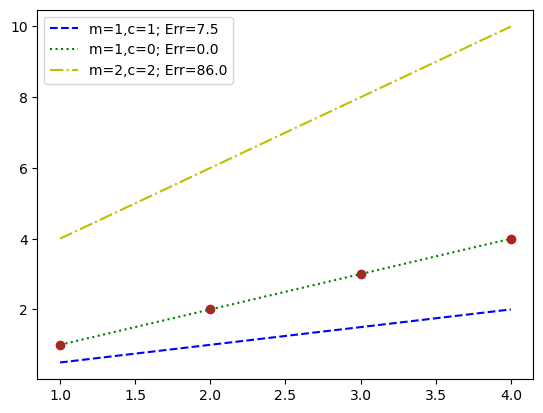

In [48]:
# consider we have the following pairs of m and c values
A = np.array([.5,0])
B = np.array([1,0])
C = np.array([2,2])
MC = np.vstack([A,B,C]).T

#our data points are as follows
D = np.array([[1,1],[2,2],[3,3],[4,4]])

# So now we obtain our predicted value using the dependent variable X
O = np.ones((D.shape[0])).T
DM = np.vstack([D[:,0],O]).T

#Carring out matrix multiplication
P = DM@MC

#finding the squared error
S = np.sum((P-D[:,1].reshape(4,1))**2,axis=0)

#plotting these error
fig,ax = plt.subplots()
ax.scatter(D[:,0],D[:,1],marker='o',color='firebrick')
ax.plot(D[:,0],P[:,0],ls='--',c='b',label=f'm=1,c=1; Err={S[0]}')
ax.plot(D[:,0],P[:,1],ls=':',c='g',label=f'm=1,c=0; Err={S[1]}')
ax.plot(D[:,0],P[:,2],ls='-.',c='y',label=f'm=2,c=2; Err={S[2]}')

ax.legend()
plt.show()

## Gradient Descent and the Convergence algorithm
* Convergence is a process whereby the cost function $J_\theta$ hovers about a point.
* We can have the cost function converge by adjusting its parameters until it hits a global minimum (i.e it cannot be optimized any furthur)
* The equation is:<p style='text-align:center;'>$\theta_j=\theta_j-\alpha\frac{\partial}{\partial \theta_j}J(\theta_0,\theta_1)$</p>
where,
- $\alpha$ is the learning rate
- $\partial/\partial \theta_j$ is the partial derivative of the cost function wrt $\theta_j$

* There is always a chance that a function may get stuck in a local minimum, but that is not the case with the linear regression cost function, that will always come to the global minimum

Performing partial differentiation wrt $\theta_0$:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) =\frac{\partial}{\partial \theta_0}\frac{1}{2m}\Sigma_{i=1}^{m}(h_\theta(x_i)-y_i)^2$

$\hspace{46pt}=\frac{1}{m}\Sigma_{i=1}^{m}(\theta_0+\theta_1x_i-y_i)=0$

$\hspace{55pt}\frac{1}{m}\Sigma_{i=1}^{m}\theta_0+\theta_1\frac{1}{m}\Sigma_{i=1}^{m}x_i=\frac{1}{m}\Sigma_{i=1}^{m}y_i$

$\hspace{100pt}\theta_0+\theta_1\mu_x=\mu_y$

Differentiating wrt $\theta_1$:

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) =\frac{\partial}{\partial \theta_1}\frac{1}{2m}\Sigma_{i=1}^{m}(h_\theta(x_i)-y_i)^2$

$\hspace{46pt}=\frac{1}{m}\Sigma_{i=1}^{m}(\theta_0+\theta_1x_i-y_i)x_i=0$

$\hspace{55pt}\theta_0\frac{1}{m}\Sigma_{i=1}^{m}x_i+\theta_1\frac{1}{m}\Sigma_{i=1}^{m}x^2_i=\frac{1}{m}\Sigma_{i=1}^{m}x_iy_i$

$\hspace{77pt}\theta_0\mu_x+\theta_1\frac{1}{m}\Sigma_{i=1}^{m}x^2_i=\frac{1}{m}\Sigma_{i=1}^{m}x_iy_i$

We can solve the two obtained equations together to find the Line-of-Best-Fit parameters

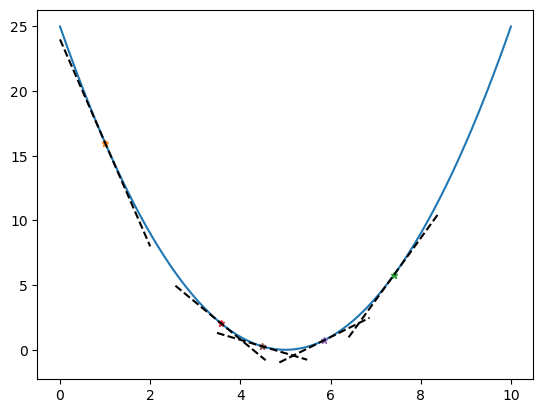

In [74]:
# gradient descent
x= np.linspace(0,10,10000)
y = (x-5)**2

#plotting
fig,ax = plt.subplots()
ax.plot(x,y)

#the learning rate =.01
alpha=.8

#say we begin the gradient descent at the point (1,16) we will plot it here
a=1
ax.plot(a,(a-5)**2,marker='*',markersize=5)
# we will plot the slope at the point
x_a = np.linspace(a-1,a+1,100)
y_a = 2*(a-5)*(x_a-1)+(a-5)**2
ax.plot(x_a,y_a,ls='--',c='k')

# we will now shift the x by our alpha value times the gradient
b = a-2*(a-5)*alpha

#plotting the value
ax.plot(b,(b-5)**2,marker='*',markersize=5)
# we will plot the slope at the point
x_b = np.linspace(b-1,b+1,100)
y_b = 2*(b-5)*(x_b-b)+(b-5)**2
ax.plot(x_b,y_b,ls='--',c='k')

# we will now shift the x by our alpha value times the gradient
c = b-2*(b-5)*alpha

#plotting the value
ax.plot(c,(c-5)**2,marker='*',markersize=5)
# we will plot the slope at the point
x_c = np.linspace(c-1,c+1,100)
y_c = 2*(c-5)*(x_c-c)+(c-5)**2
ax.plot(x_c,y_c,ls='--',c='k')

# we will now shift the x by our alpha value times the gradient
d = c-2*(c-5)*alpha

#plotting the value
ax.plot(d,(d-5)**2,marker='*',markersize=5)
# we will plot the slope at the point
x_d = np.linspace(d-1,d+1,100)
y_d = 2*(d-5)*(x_d-d)+(d-5)**2
ax.plot(x_d,y_d,ls='--',c='k')

# we will now shift the x by our alpha value times the gradient
e = d-2*(d-5)*alpha

#plotting the value
ax.plot(e,(e-5)**2,marker='*',markersize=5)
# we will plot the slope at the point
x_e = np.linspace(e-1,e+1,100)
y_e = 2*(e-5)*(x_e-e)+(e-5)**2
ax.plot(x_e,y_e,ls='--',c='k')


plt.show()

## Overfitting and Underfitting 
Before going to Over and Underfitting, we'll first define bias and variance
___
* **Bias**
    - Also called “error due to squared bias”, bias is the amount that a model’s prediction differs from the target value, compared to the training data. 
    - Bias error results from simplifying the assumptions used in a model so the target functions are easier to approximate. Bias can be introduced by model selection.
    - Every algorithm starts with some level of bias, because bias results from assumptions in the model that make the target function easier to learn. 
* **Variance**
    - Variance indicates how much the estimate of the target function will alter if different training data were used. In other words, variance describes how much a random variable differs from its expected value. 
    - Variance is based on a single training set. It measures the inconsistency of different predictions using different training sets — it’s not a measure of overall accuracy.
---
- **Overfitting**
    - Variance can lead to overfitting, in which small fluctuations in the training set are magnified. A model with high-level variance may reflect random noise in the training data set instead of the target function.
- **Underfitting**
    - A high level of bias can lead to underfitting, which occurs when the algorithm is unable to capture relevant relations between features and target outputs. A high bias model typically includes more assumptions about the target function or end result. A low bias model incorporates fewer assumptions about the target function.
![](overunder.jpg)